In [3]:
#importing libraring
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib


#loading dataset
df= pd.read_csv("dataset.csv")
print("dataset loaded")
print(df.head())

#filling missing values wihth column means
df.fillna(df.mean(), inplace=True)
print("missing values filled")

#separate features and target
X=df.drop("Potability", axis=1)
y=df["Potability"]

#Saving the feature column names (for future prediction use)
feature_columns = list(X.columns)
joblib.dump(feature_columns, "feature_columns.joblib")
print("Feature column names saved to 'feature_columns.joblib'")

#Spliting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Split into training and testing sets")

#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Saving the scaler
joblib.dump(scaler, "scaler.joblib")
print("Scaler saved as 'scaler.joblib'")


dataset loaded
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
missing values filled
Feature column names saved to 'feature_columns.joblib'
Split into training and testing sets
Scaler saved as 'scaler.joblib

In [4]:
print(df.isnull().sum())  # shows the number of missing values in each column

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [5]:
print(f"Training set features shape: {X_train.shape}")
print(f"Test set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Test set target shape: {y_test.shape}")


Training set features shape: (2620, 9)
Test set features shape: (656, 9)
Training set target shape: (2620,)
Test set target shape: (656,)


In [6]:
print("Original X_train sample:\n", X_train.head())
print("Scaled X_train sample:\n", X_train_scaled[:5])


Original X_train sample:
             ph    Hardness        Solids  Chloramines     Sulfate  \
233   6.623614  203.030141  17167.301297     6.049601  311.726288   
831   6.684700  193.840931  34157.184474     9.876574  344.535407   
2658  6.836060  205.667718  18321.327502     6.712854  297.837188   
2495  7.080795  183.488839  12675.938962     9.777807  319.870584   
2603  6.406798  182.885137  17851.064021     7.462758  332.486731   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
233     410.243247       15.914500        65.021229   2.915166  
831     498.063996        8.818757        66.659352   4.030660  
2658    494.484249       13.808923        70.714225   4.952508  
2495    482.445026       13.309723        46.853410   3.240419  
2603    398.779746       17.301617        64.070236   4.573968  
Scaled X_train sample:
 [[-0.31737702  0.20204646 -0.55463361 -0.66652723 -0.60663572 -0.19929648
   0.50622105 -0.08431476 -1.3411035 ]
 [-0.27560552 -0.08006604  1.368

In [7]:
feature_columns_loaded = joblib.load("feature_columns.joblib")
scaler_loaded = joblib.load("scaler.joblib")
print(f"Feature columns loaded: {feature_columns_loaded}")


Feature columns loaded: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1


Logistic Regression
Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


Random Forest
Accuracy: 0.6753048780487805
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.35      0.44       244

    accuracy                           0.68       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.68      0.65       656


SVM
Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Training and evaluating each model
for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    model.fit(X_train_scaled, y_train)  # Train on scaled data
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Training and evaluating: Logistic Regression
Accuracy: 0.6280487804878049
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


Training and evaluating: Random Forest


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.6844512195121951
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78       412
           1       0.64      0.34      0.45       244

    accuracy                           0.68       656
   macro avg       0.67      0.62      0.61       656
weighted avg       0.68      0.68      0.66       656


Training and evaluating: SVM
Accuracy: 0.6951219512195121
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       412
           1       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656


Training and evaluating: KNN
Accuracy: 0.6280487804878049
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1      

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Focus on F1 for balanced precision/recall
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [5]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test_scaled)
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Final Report:\n", classification_report(y_test, y_pred))


Final Accuracy: 0.6707317073170732
Final Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77       412
           1       0.61      0.32      0.42       244

    accuracy                           0.67       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.66      0.67      0.64       656



In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Updated Random Forest with class_weight='balanced'
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best model after grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [7]:
# Predicting on test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Final Report:\n", classification_report(y_test, y_pred))


Final Accuracy: 0.6753048780487805
Final Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76       412
           1       0.59      0.42      0.49       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.63       656
weighted avg       0.66      0.68      0.66       656



In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", dict(pd.Series(y_train).value_counts()))
print("After SMOTE:", dict(pd.Series(y_train_resampled).value_counts()))


Before SMOTE: {0: np.int64(1586), 1: np.int64(1034)}
After SMOTE: {0: np.int64(1586), 1: np.int64(1586)}


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Recreating model with best hyperparameters and class_weight
smote_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)

# Training on SMOTE-resampled data
smote_model.fit(X_train_resampled, y_train_resampled)

# Predicting on original test set
y_pred_smote = smote_model.predict(X_test_scaled)

# Evaluatingggggggg
print("SMOTE Model Accuracy:", accuracy_score(y_test, y_pred_smote))
print("SMOTE Classification Report:\n", classification_report(y_test, y_pred_smote))


SMOTE Model Accuracy: 0.6676829268292683
SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       412
           1       0.55      0.57      0.56       244

    accuracy                           0.67       656
   macro avg       0.65      0.65      0.65       656
weighted avg       0.67      0.67      0.67       656



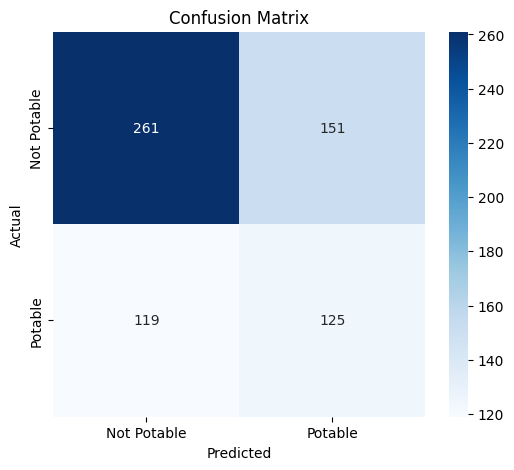

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)  # Replace 'model' with your actual trained model

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [11]:
# Save the confusion matrix plot
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.close()


NameError: name 'cm_display' is not defined

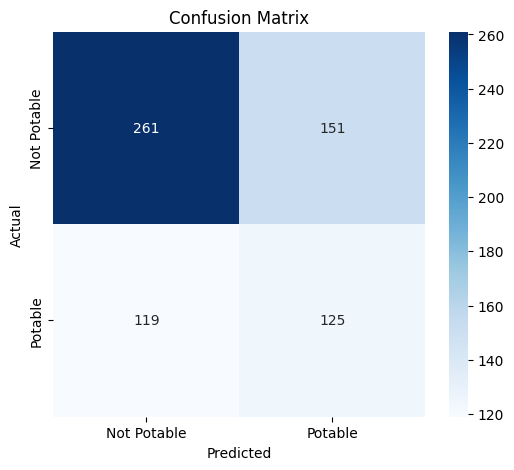

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions with your trained model
y_pred = model.predict(X_test_scaled)  # Replace 'model' with your actual trained model

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the confusion matrix plot
plt.savefig('confusion_matrix.png')

# Display the plot
plt.show()


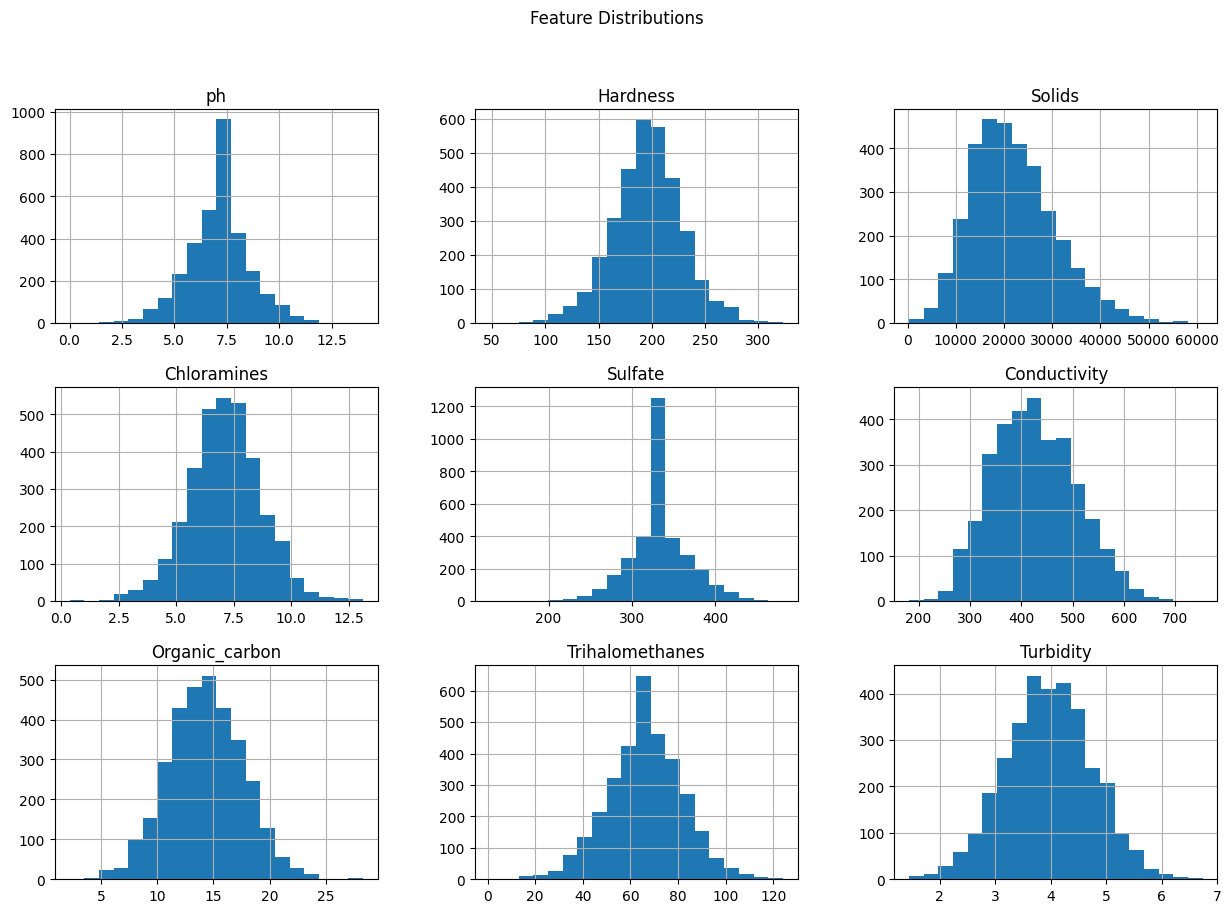

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for each feature
X.hist(figsize=(15, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


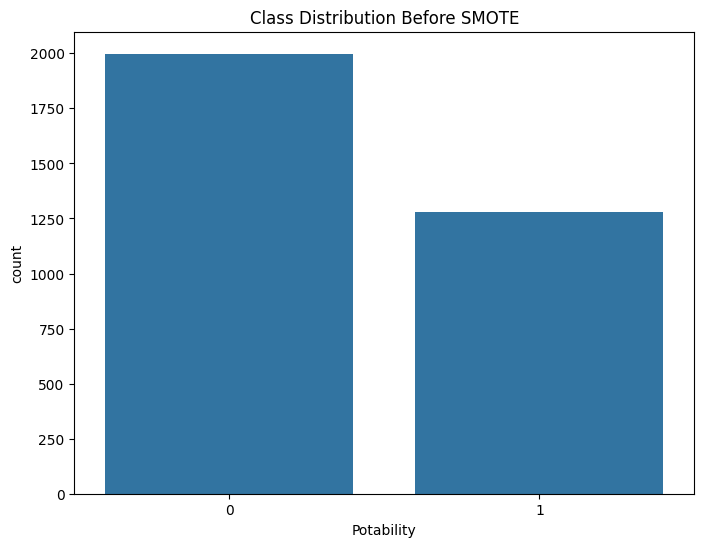

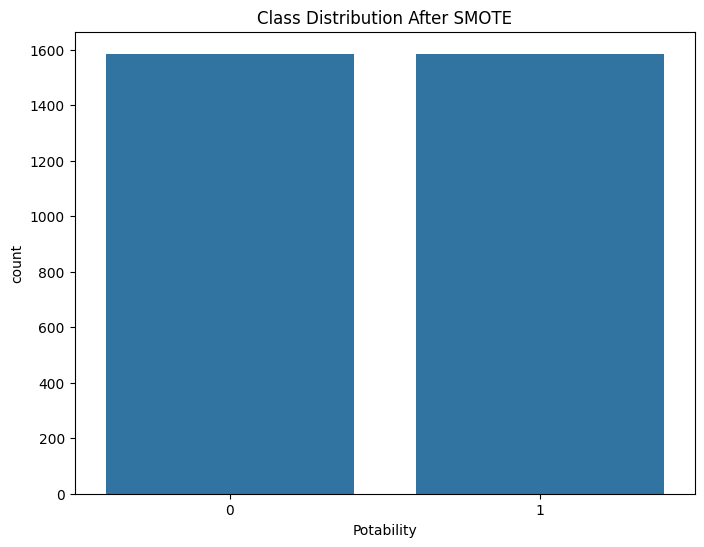

In [14]:
# Before SMOTE: Original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.show()

# After SMOTE: Resampled class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()


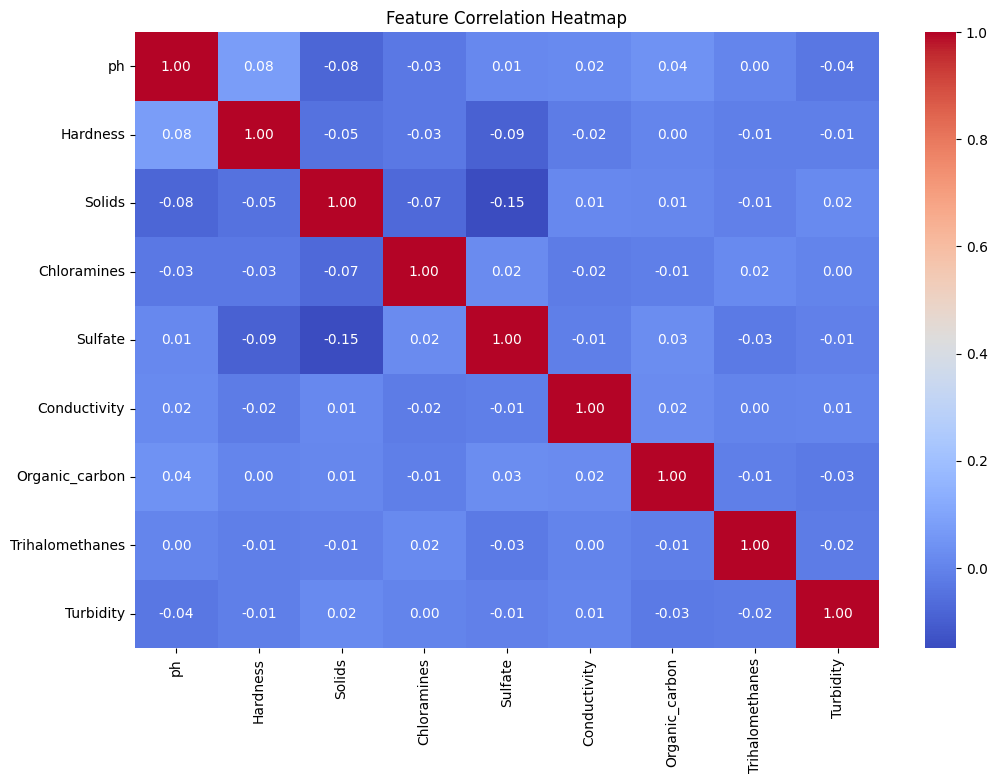

In [15]:
correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


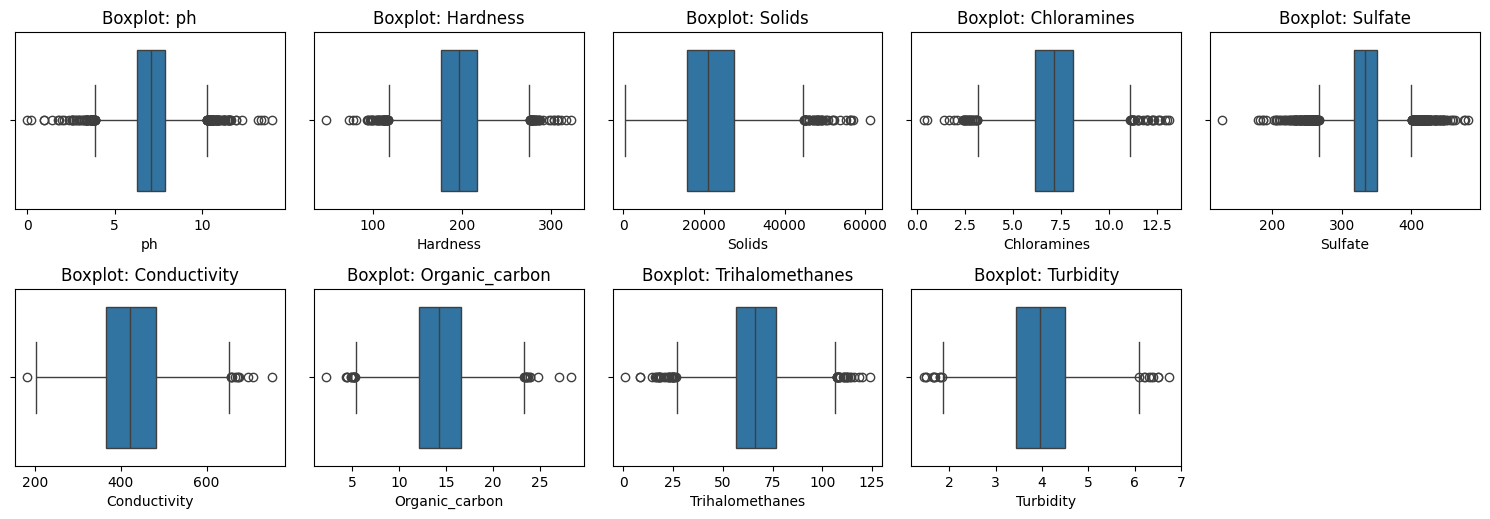

In [16]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 5, i)  # Adjust the grid size as per number of features
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot: {column}')
plt.tight_layout()
plt.show()


In [17]:
from scipy.stats import zscore

# Calculate Z-scores for all features
z_scores = zscore(X)

# Identify rows with Z-scores greater than 3 (common threshold for outliers)
outliers = (z_scores > 3).all(axis=1)
print(f"Number of outliers detected: {sum(outliers)}")

# You can remove the outliers (if needed)
X_no_outliers = X[~outliers]


Number of outliers detected: 0


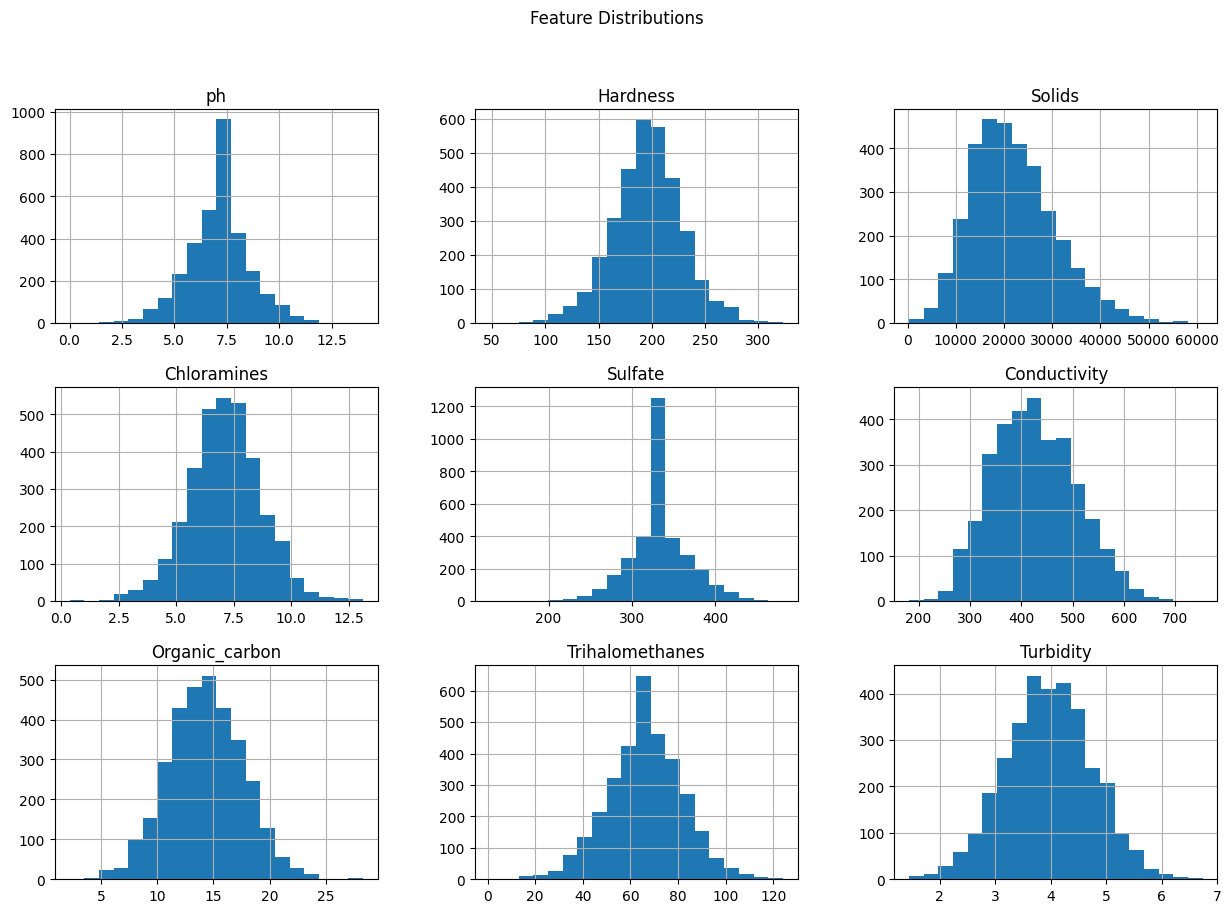

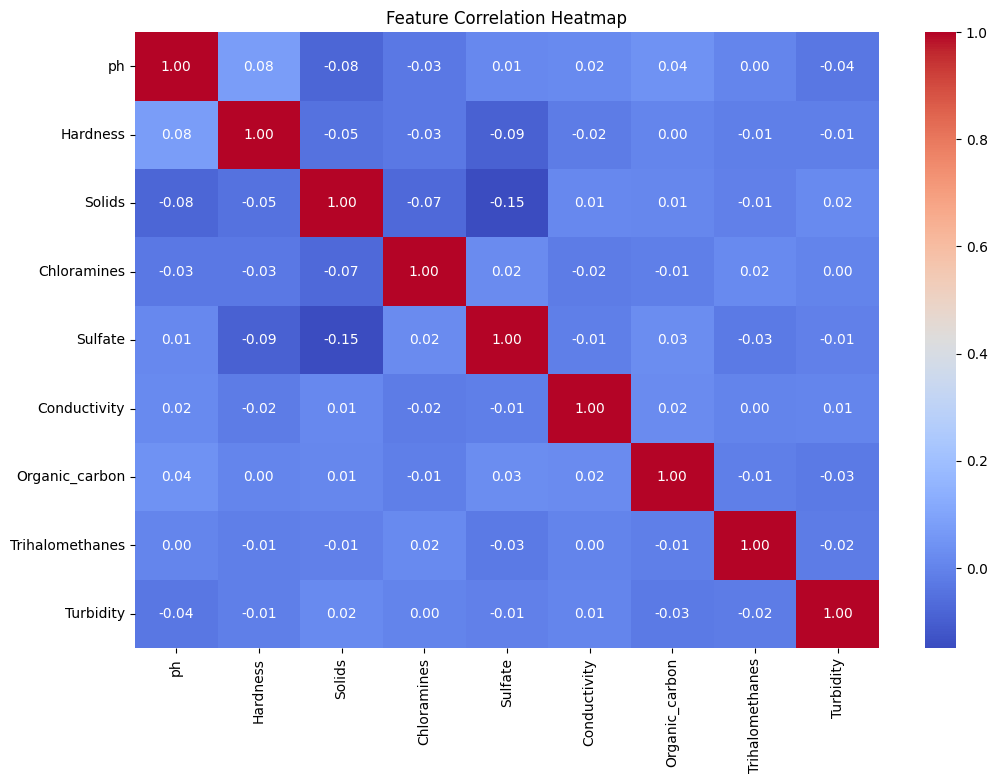

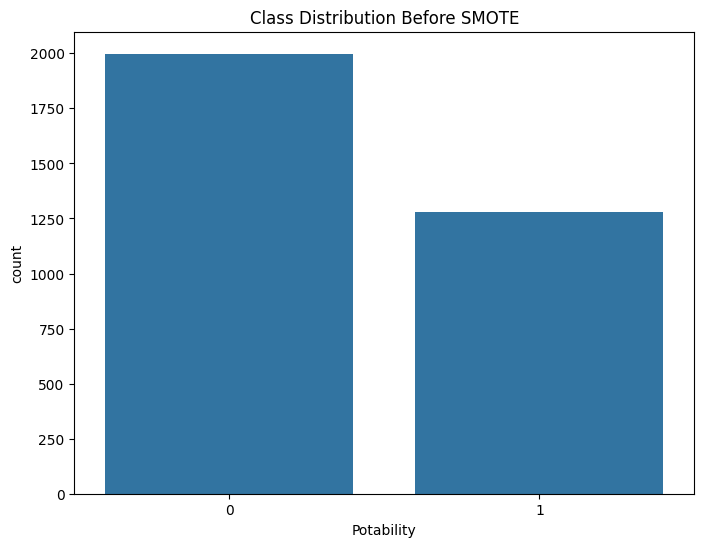

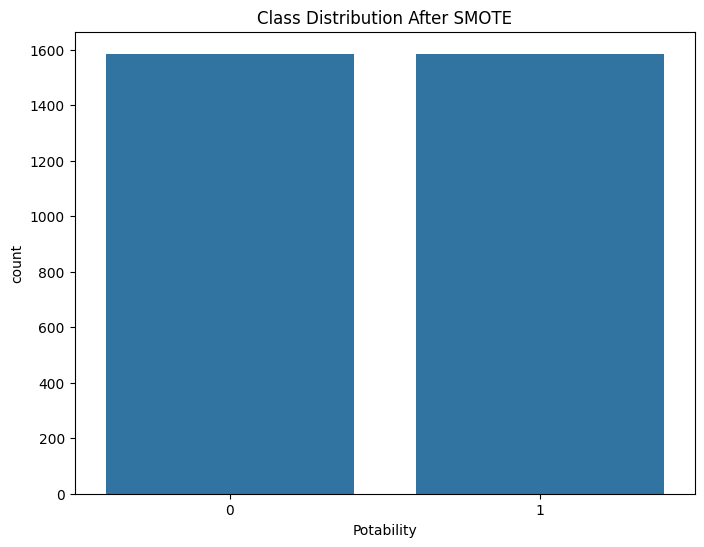

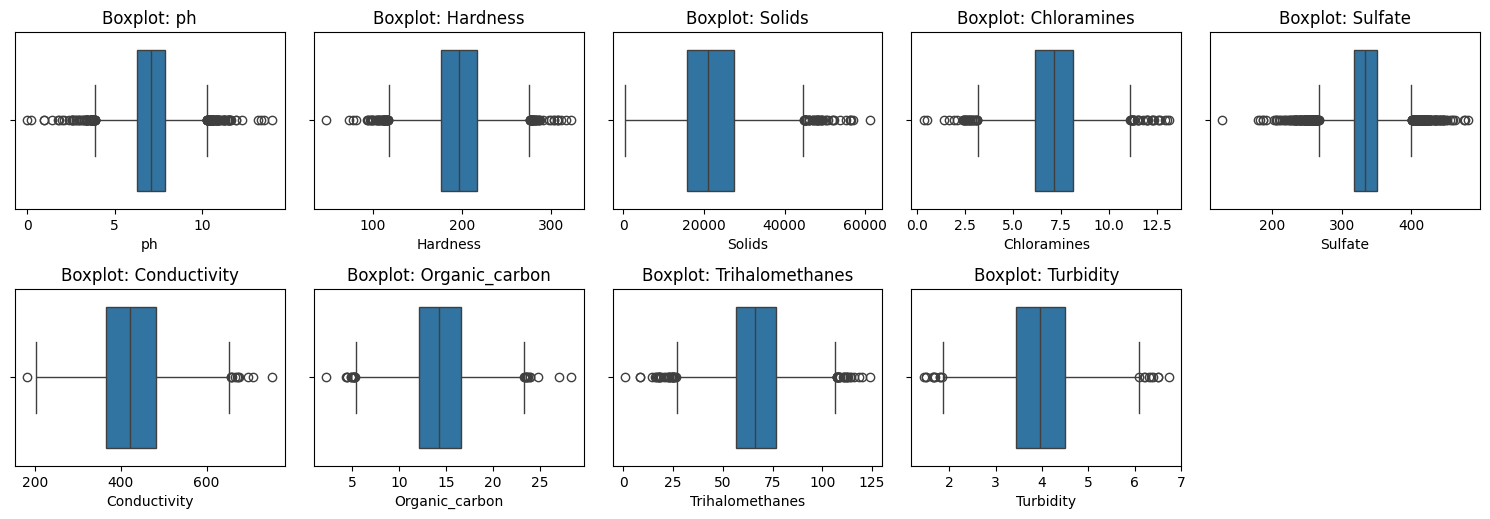

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for each feature
X.hist(figsize=(15, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.savefig('feature_distributions.png')  # Save the histogram plot
plt.show()

# Compute correlation matrix
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.savefig('correlation_heatmap.png')  # Save the heatmap plot
plt.show()

# Class Distribution Before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.savefig('class_distribution_before_smote.png')  # Save class distribution plot before SMOTE
plt.show()

# After SMOTE: Resampled class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.savefig('class_distribution_after_smote.png')  # Save class distribution plot after SMOTE
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 5, i)  # Adjust the grid size as per number of features
    sns.boxplot(x=X[column])
    plt.title(f'Boxplot: {column}')
plt.tight_layout()
plt.savefig('boxplots_outliers.png')  # Save the boxplots plot
plt.show()


In [19]:
# Check skewness
skewness = X.skew()
print(skewness)

# Apply log transformation to highly skewed features
X_transformed = X.copy()
X_transformed['some_feature'] = np.log1p(X['some_feature'])


ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
dtype: float64


NameError: name 'np' is not defined

In [21]:
import numpy as np

# Apply log transformation to features with slight skewness
X_transformed = X.copy()
X_transformed['Solids'] = np.log1p(X['Solids'])
X_transformed['Conductivity'] = np.log1p(X['Conductivity'])


In [22]:
from sklearn.ensemble import RandomForestClassifier
import joblib

model = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, random_state=42)

model.fit(X_train_resampled, y_train_resampled)

# Saving the trained model as a .pkl file
joblib.dump(model, 'final_trained_model.pkl')


['final_trained_model.pkl']

In [23]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=10, random_state=42)

model.fit(X_train_resampled, y_train_resampled)

joblib.dump(model, 'final_trained_model.pkl')


['final_trained_model.pkl']

Accuracy: 0.6448170731707317
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       412
           1       0.52      0.55      0.53       244

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.65      0.64      0.65       656



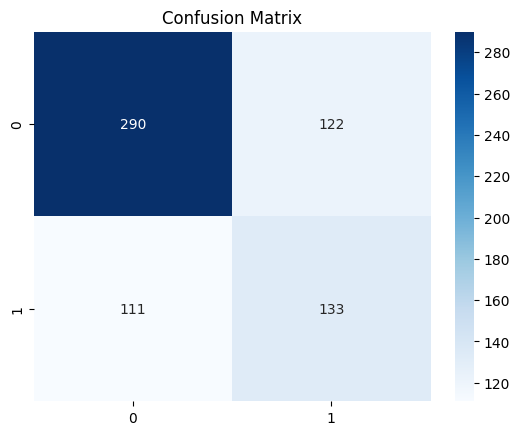

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


<Figure size 1500x1000 with 0 Axes>

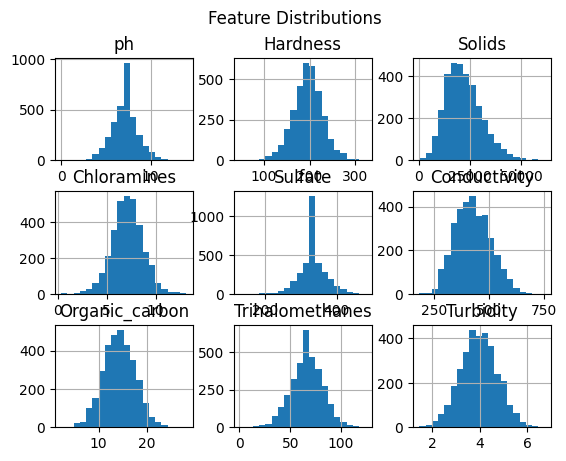

In [29]:
plt.figure(figsize=(15, 10))
X.hist(bins=20)
plt.suptitle('Feature Distributions')
plt.savefig('feature_distributions.png')


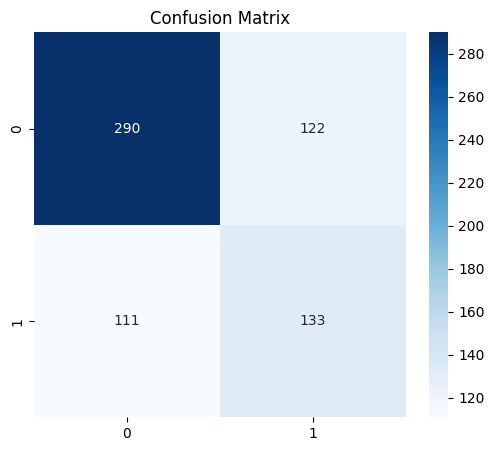

In [26]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
